In [29]:
from __future__ import division
import math
import random
from lin_alg import dot

### Perceptrons

In [5]:
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """returns 1 if perceptron fires, 0 if not"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

### Feed Forward NN

In [6]:
def sigmoid(t):
    return 1.0 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

In [22]:
# NN is then a list of lists of lists (where layers have neurons that have weights)

def feed_forward(neural_network, input_vector):
    """NN (list of lists of lists)
    returns output from forward prop"""
    
    outputs = []
    
    # for each layer add bias, compute output, pass on
    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias)
                 for neuron in layer]
        outputs.append(output)
        
        input_vector = output
        
    return outputs

### Backpropogation

1. Run `feed_forward` on an input to get an output
2. Calculate the error of that output
3. Calculate the gradient of the error as a func of weights and adjust the weights to decrease the error (gradient descent ish)
4. Propogate these weight changes into the hidden layers
5. Compute the errors and adjust in hidden layer as above
6. Repeat until error drops below tolerance (convergence)

In [23]:
def backpropogate(network, input_vector, targets):
    
    hidden_outputs, outputs = feed_forward(network, input_vector)
    
    # recall derivative of sigmoid is same as logit
    output_deltas = [output * (1 - output) * (output - target)
                    for output, target in zip(outputs, targets)]
    
    # adjust weights gradient descent style
    for i, output_neuron in enumerate(network[-1]):
        # iterate over hidden layers
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output
            
    # now propogate this change backward
    hidden_deltas = [hidden_output * (1 - hidden_output) * 
                    dot(output_deltas, [n[i] for n in output_layer])
                    for i, hidden_output in enumerate(hidden_outputs)]
    
    # adjust weights
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

In [24]:
raw_digits = [
          """11111
             1...1
             1...1
             1...1
             11111""",
             
          """..1..
             ..1..
             ..1..
             ..1..
             ..1..""",
             
          """11111
             ....1
             11111
             1....
             11111""",
             
          """11111
             ....1
             11111
             ....1
             11111""",     
             
          """1...1
             1...1
             11111
             ....1
             ....1""",             
             
          """11111
             1....
             11111
             ....1
             11111""",   
             
          """11111
             1....
             11111
             1...1
             11111""",             

          """11111
             ....1
             ....1
             ....1
             ....1""",
             
          """11111
             1...1
             11111
             1...1
             11111""",    
             
          """11111
             1...1
             11111
             ....1
             11111"""]

def make_digit(raw_digit):
        return [1 if c == '1' else 0
                for row in raw_digit.split("\n")
                for c in row.strip()]
                
inputs = map(make_digit, raw_digits)

In [25]:
targets = [[1 if i == j else 0 for i in range(10)]
          for j in range(10)]

In [26]:
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [27]:
random.seed(0)

input_size = 25
num_hidden = 5
output_size = 10

hidden_layer = [[random.random() for _ in range(input_size + 1)]
               for _ in range(num_hidden)]

output_layer = [[random.random() for _ in range(num_hidden + 1)]
               for _ in range(output_size)]

network = [hidden_layer, output_layer]

In [30]:
for _ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropogate(network, input_vector, target_vector)

In [31]:
def predict(input):
    return feed_forward(network, input)[-1]

In [32]:
predict(inputs[7])

[0.025793093227013036,
 1.0390112396817274e-05,
 9.947293909617134e-11,
 0.018331084215773293,
 0.0008805361567366292,
 6.518540927082727e-10,
 3.357053164825462e-08,
 0.9672303985483536,
 1.2751656786725538e-08,
 3.4087140488881706e-08]

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import binary
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_context('poster')

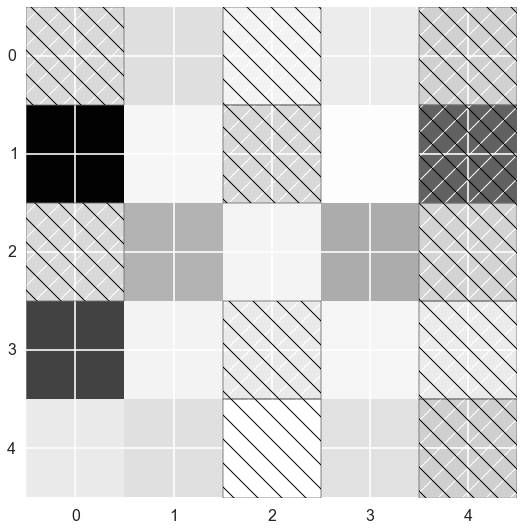

In [36]:
weights = network[0][0]
abs_weights = map(abs, weights)

grid = [abs_weights[row:(row + 5)]
       for row in range(0, 25, 5)]

ax = plt.gca()
ax.imshow(grid,
          cmap = binary,
          interpolation = 'none')

def patch(x, y, hatch, color):
    return Rectangle((x - 0.5, y - 0.5), 1, 1,
                    hatch = hatch, fill = False, color = color)

for i in range(5):
    for j in range(5):
        if weights[5*i + j] < 0:
            ax.add_patch(patch(j,i,'/','white'))
            ax.add_patch(patch(j,i,'\\','black'))